In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel(r"\Users\lenovo\Documents\Analizy excel\Feerum.xlsx","Balance")
time = df['time'] ; year = ('2015' , '2016','2017','2018','2019','2020')

In [7]:
class Balance:
    def __init__(self , time):
        self.time = time 
        self.year = year
        self.shares = df['shares']
        self.revenue = df['sell revenue']
        self.net_profit = df['net profit']
        self.Last4_profit = []
        self.Last4_revenue = []
        self.Revenue_year = [ np.sum(self.revenue[i:i+4]) for i in range(0,len(self.shares),4) ]
        self.Last4_profit = [ np.sum(self.net_profit[i-4:i]) for i in range(4,len(self.shares)+1) ]
        self.Last4_revenue = [ np.sum(self.revenue[i-4:i]) for i in range(4,len(self.shares)+1) ]
        self.Gross_profit = df['brutto profit']
     
        
        self.Noncurrent_assets = df['Noncurrent_assets']
        self.Tangible = df['Tangible']
        self.Nontangible = df['Nontangible']
        self.Current_assets = df['Current_assets']
        #self.Supplies = df['Supplies']
        self.Assets_total = self.Noncurrent_assets + self.Current_assets
        self.cash = df['Cash']
        self.Assets_year_mean = [ np.mean(self.Assets_total[i:i+4]) for i in range(0,len(self.shares),4) ]
    
        self.Short_debt = df['Short_debt']
        self.Long_debt = df['Long_debt']
        self.Liabilities = self.Short_debt + self.Long_debt
        
        self.Operating_flow = df['Operating_flow']
        self.Amortization = df['Amortization']
        self.Investment_flow = df['Investment_flow']
        self.CAPEX = df['CAPEX']
        self.Financial_flow = df['Financial_flow']
        
        self.Equity = self.Assets_total - self.Liabilities
        self.beta = self.Equity[3:len(self.Equity)]/self.Last4_revenue
        self.ROE = self.Last4_profit/self.Equity[3:len(self.Equity)]
        self.Assets_productivity = [ self.Revenue_year[i]/self.Assets_year_mean[i]*100 for i in range(0,len(self.Revenue_year))]
        self.Current_ratio = self.Current_assets/self.Short_debt
        #self.QuickRatio = (self.Current_assets-self.Supplies)/self.Short_debt
        self.Cash_cover = self.cash/self.Short_debt
        self.Invested_capital = self.Assets_total-self.cash-self.Equity
        self.ROIC = self.Gross_profit/self.Invested_capital
        
    def equity(self):
        self.fig = plt.figure(figsize = (20,15) , dpi=80)
        self.ax = plt.subplot(311)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        
        plt.bar(self.time, self.Equity/self.shares*1000, 
                label='equity/share ='"$"+str(round(self.Equity[len(self.shares)-1]/self.shares[len(self.shares)-1]*1000,2))+"$")
        plt.plot(self.time, self.cash/self.shares*1000 , color='green', linewidth = 3, 
                 label='cash/share ='"$"+str(round(self.cash[len(self.shares)-1]/self.shares[len(self.shares)-1]*1000,2))+"$")
        
        plt.xticks(rotation = 50 , fontsize = 12)
        plt.legend(loc='best' , fontsize = 12 )
        self.ax = plt.subplot(312)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        
        plt.bar(self.time[3:len(self.shares)], self.ROE*100, color='darkgreen')
        self.ax.set_title('ROE')
        self.ax.set_ylabel('[%]')
        plt.xticks(rotation = 50 , fontsize = 12)
        plt.tight_layout(pad=3)
        self.ax = plt.subplot(313)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        
        plt.plot(self.time[3:len(self.shares)], self.beta[3:len(self.shares)]*self.ROE*100 )
        self.ax.set_title('ROE*BETA')
        self.ax.set_ylabel('[%]')
        plt.xticks(rotation = 50 , fontsize = 12)
        plt.tight_layout(pad=3)
        self.fig = plt.figure(figsize = (20,8) , dpi=80)
        self.ax = plt.subplot()
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        plt.bar(self.time, self.Invested_capital/self.shares*1000, color='darkorange')
        plt.plot(self.time[2:len(self.shares)], self.ROIC[2:len(self.shares)]*100)
        
    def Assets(self):
        self.fig = plt.figure(figsize = (20,15) , dpi=80)
        self.ax = plt.subplot(211)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        self.ax.set_title('Assets' , fontsize = 20)
        plt.bar(self.time, self.Assets_total/1000, label='Total Assets')
        plt.plot(self.time, self.Current_assets/1000, color='firebrick',label='Current Assets')
        self.ax.set_ylabel('w mln')
        plt.xticks(rotation=50)
        self.ax = plt.subplot(212)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        plt.plot(self.year , self.Assets_productivity, label='Assets productivity = revenue/assets')
        plt.legend(loc='best')
        self.fig = plt.figure(figsize = (20,15) , dpi=80)
        self.ax = plt.subplot(211)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        plt.plot(self.time , (self.Current_assets-self.Short_debt)/self.Assets_total*100, label='(Current assets-Short debt)/Total Assets')
        plt.legend(loc='best' , fontsize = 12 )
        plt.xticks(rotation=50)
        
    def Cover(self):
        self.fig = plt.figure(figsize = (20,15) , dpi=80)
        self.ax = plt.subplot(211)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        self.ax.set_title('Liquidity' , fontsize=20)
        plt.plot(self.time, self.Current_ratio, label='Current ratio')
       # plt.plot(self.time, self.QuickRatio, label='Quick Ratio')
        plt.plot(self.time, self.Cash_cover, label='Cash cover')
        plt.legend(loc='best')
        
    def Flow(self):
        self.fig = plt.figure(figsize = (20,15) , dpi=80)
        self.ax = plt.subplot(211)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        self.ax.set_title('Flow' , fontsize=20)
        plt.plot(self.time, self.Amortization/self.Tangible*100, label='Amortization/Noncurrent assets')
        plt.legend(loc='best')
        self.ax = plt.subplot(212)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        plt.scatter(self.time, (self.Operating_flow-self.CAPEX)/self.shares*1000, color='lime')
        
        
        
        

0     15268
1     24765
2     54345
3     14903
4     11202
5     13189
6      9522
7      6358
8     19507
9     24864
10    23144
11    28619
12    27583
13    36791
14    36283
15    28057
16    26735
17    62267
18    86114
19    67758
20    35905
Name: sell revenue, dtype: int64

None

None

None

None

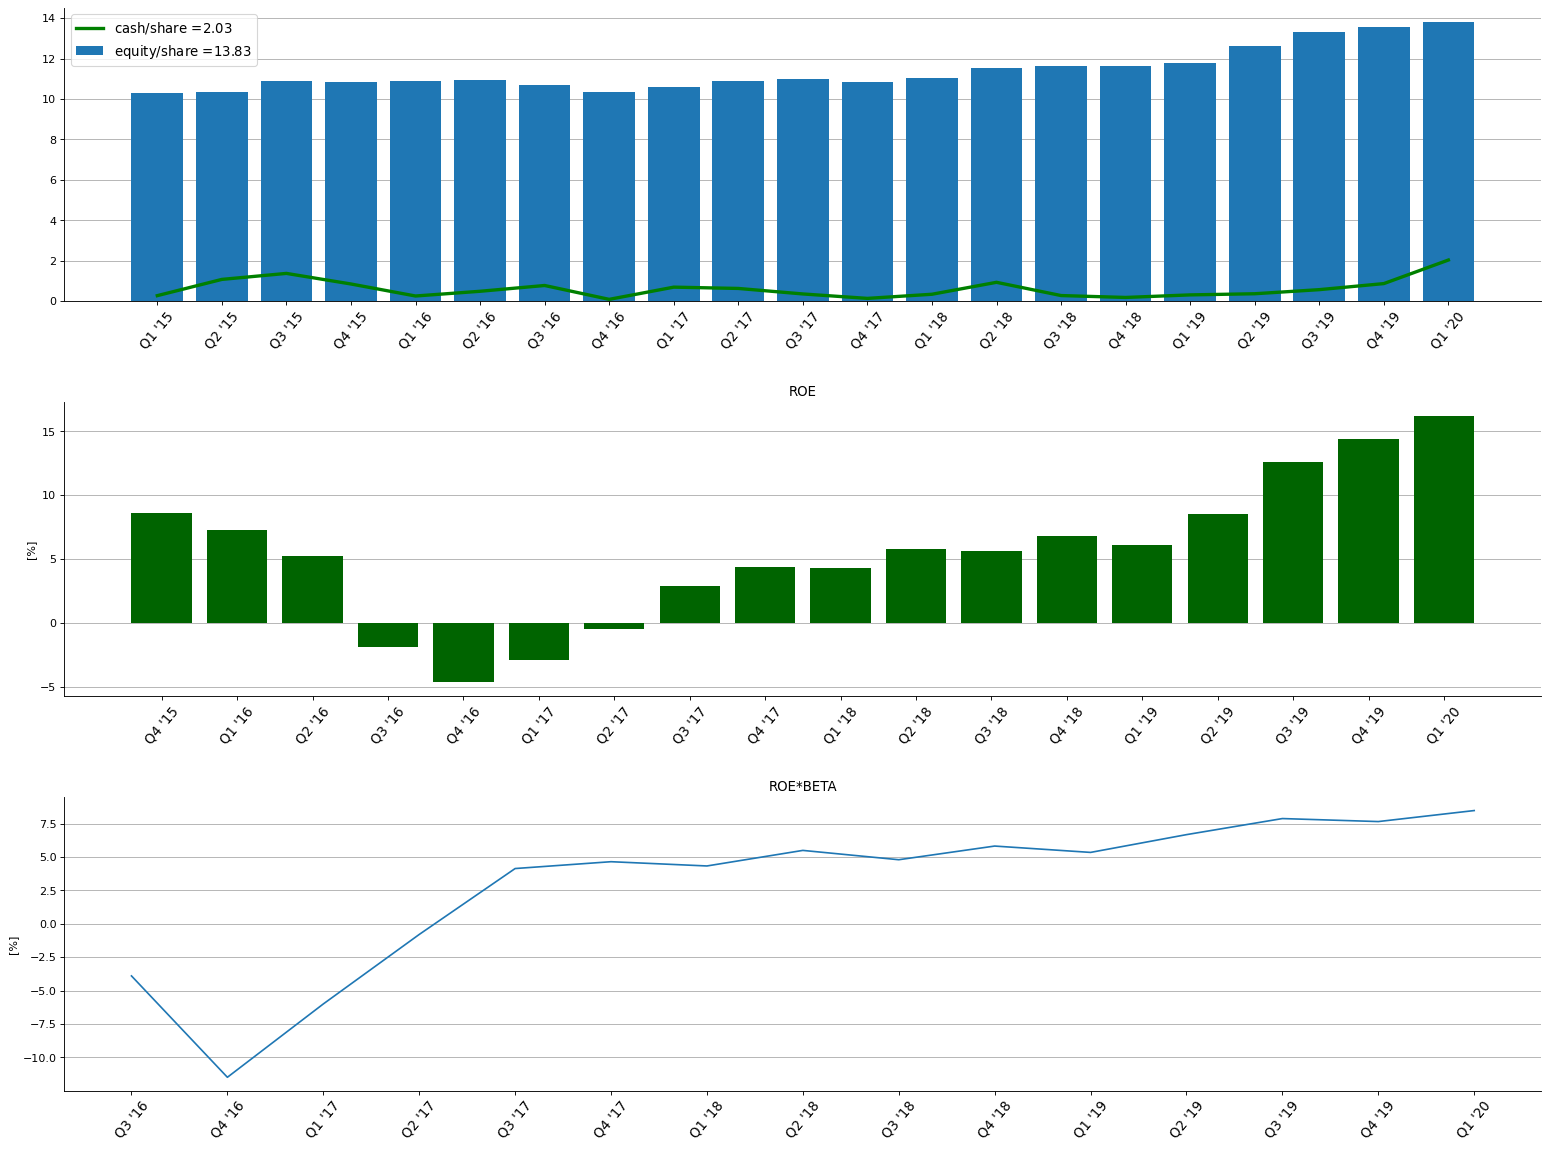

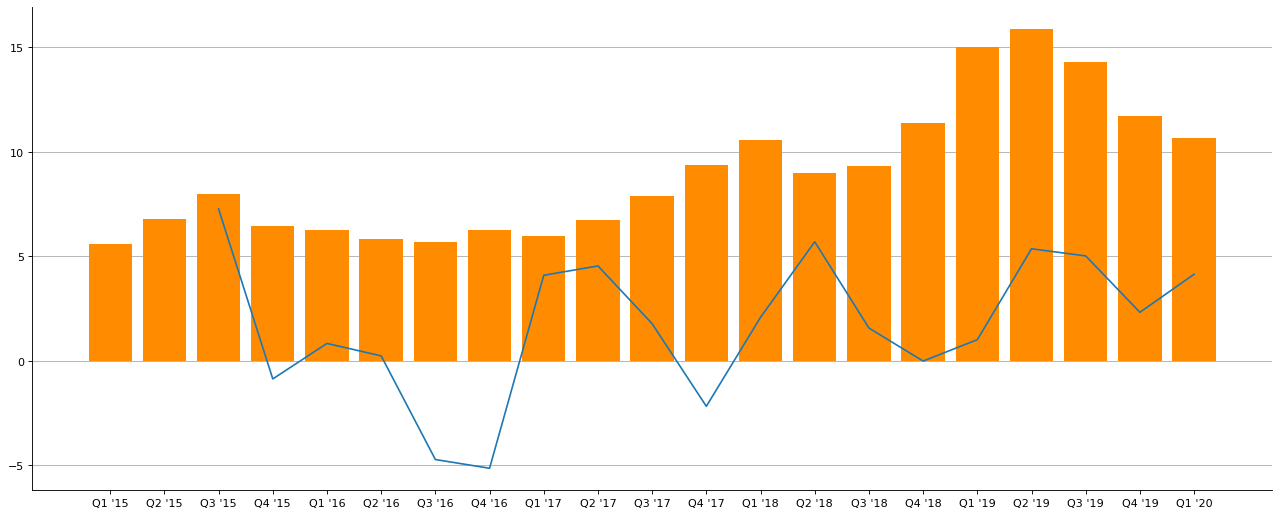

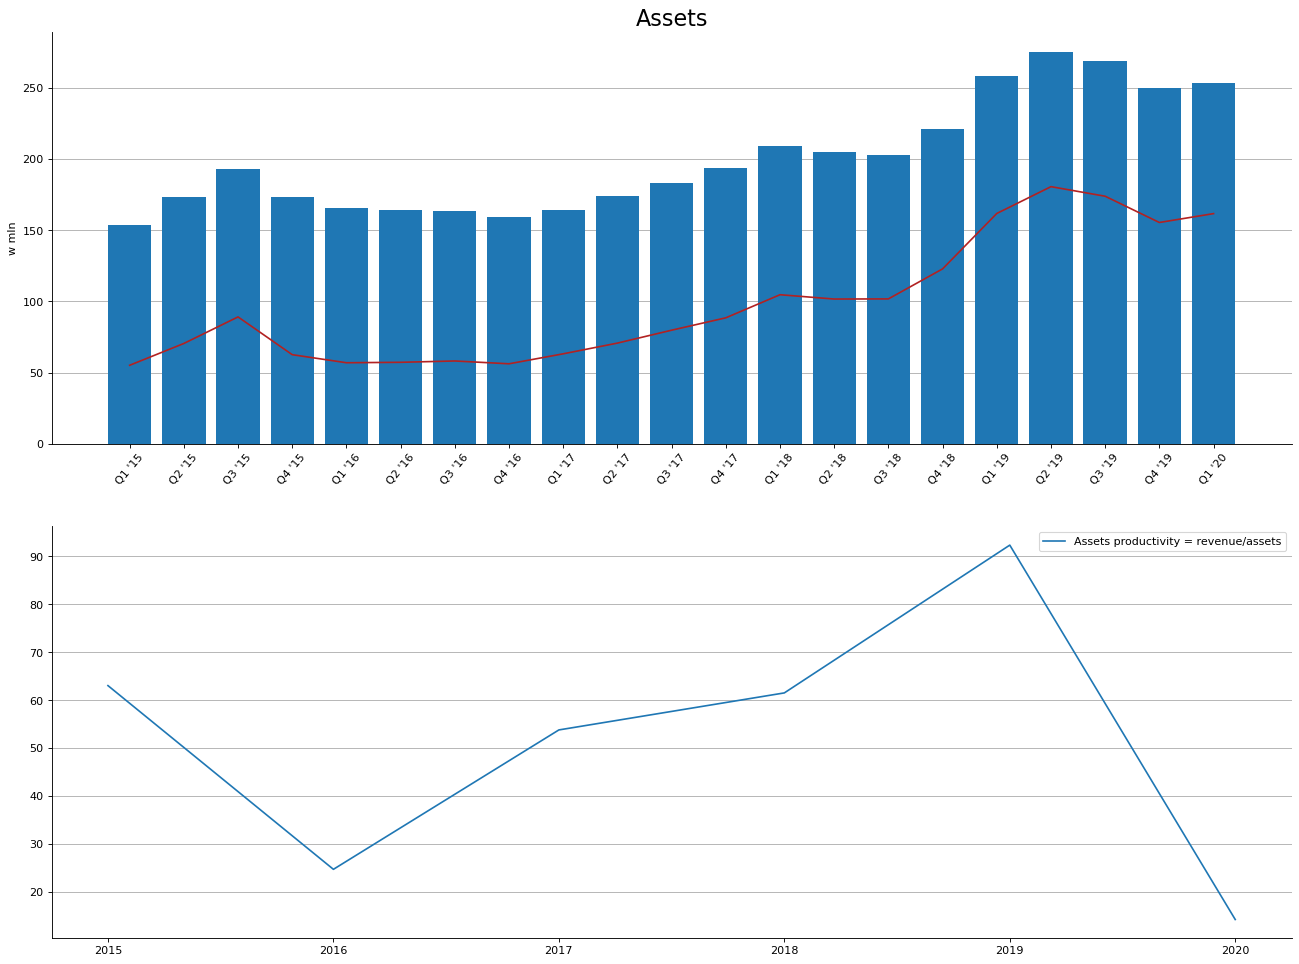

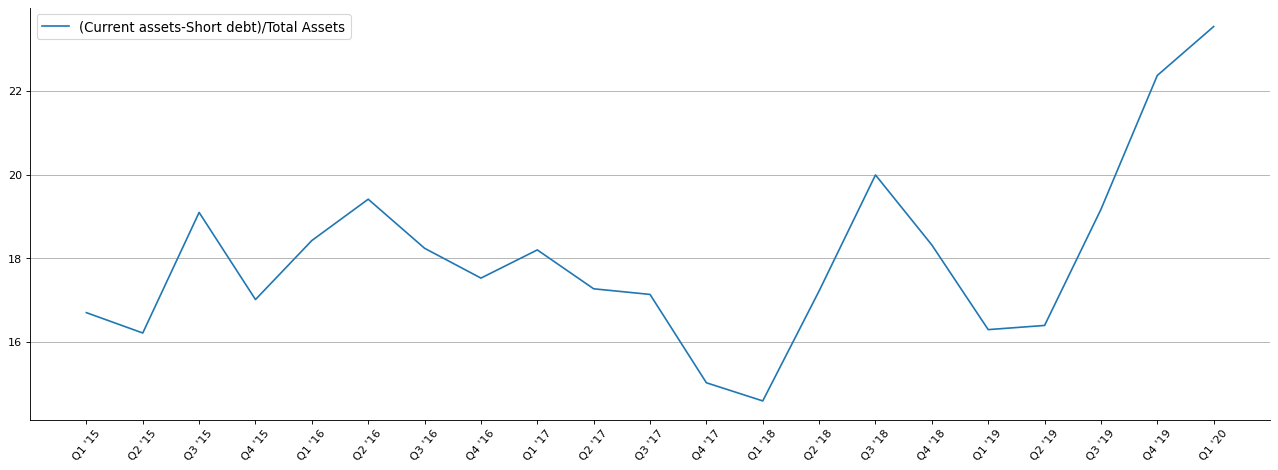

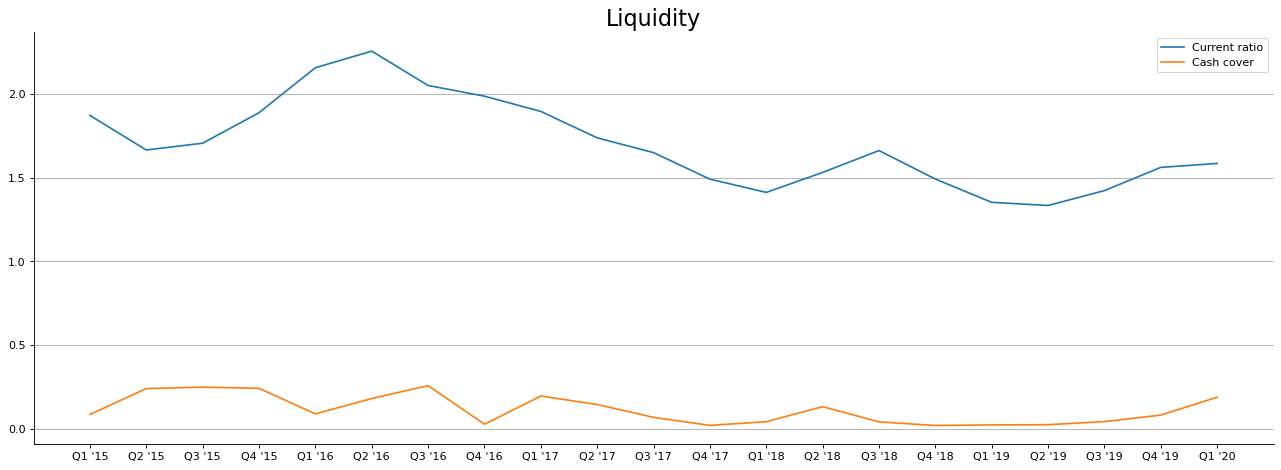

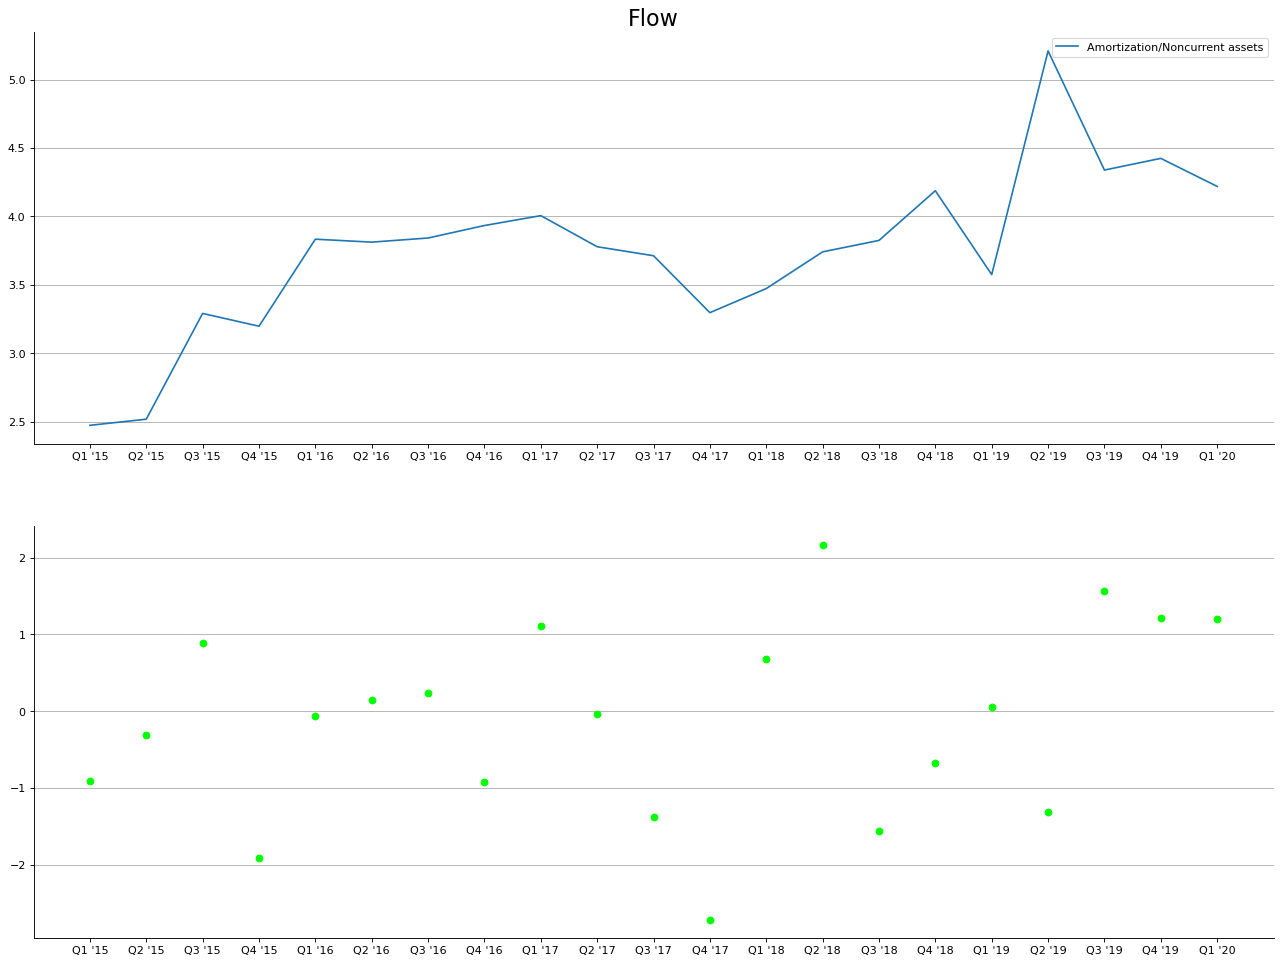

In [8]:
fin = Balance(time) 
display(fin.equity())
display(fin.Assets())
display(fin.Cover())
display(fin.Flow())